In [1]:
import sqlite3
import pandas as pd

In [2]:
from datetime import datetime, timedelta


In [3]:
import matplotlib.pyplot as plt

In [4]:
import plotly.graph_objects as go

In [5]:
datetime_object = datetime.strptime('2020-04-01', "%Y-%m-%d")

In [6]:
tm_ini = int(datetime_object.timestamp())

In [7]:


con = sqlite3.connect("dados.db")
df = pd.read_sql_query(f'SELECT * from dados_trade WHERE date > {tm_ini};', con)

# Verify that result of SQL query is stored in the dataframe
print(df.head())

con.close()

       tid        date  type        price    amount
0  5929557  1585710046  sell  32100.00003  0.007025
1  5929558  1585710046  sell  32100.00003  0.055894
2  5929559  1585710046  sell  32100.00001  0.104279
3  5929560  1585710083   buy  32397.45307  0.001458
4  5929561  1585710085  sell  32100.00006  0.003074


In [8]:
df["Date"] =df['date'].map(datetime.fromtimestamp)
df.tail()

,tid,date,type,price,amount,Date
2336139,8265696,1612205051,buy,185797.88756,0.001517,2021-02-01 15:44:11
2336140,8265697,1612205051,buy,185797.88766,0.001713,2021-02-01 15:44:11
2336141,8265698,1612205053,buy,185797.88636,0.000544,2021-02-01 15:44:13
2336142,8265699,1612205059,sell,185110.32439,0.005350,2021-02-01 15:44:19
2336143,8265700,1612205060,buy,185797.88403,0.008073,2021-02-01 15:44:20


In [9]:
# index = pd.date_range(start=f'{d_start.day}/{d_start.month}/{d_start.year}', end=d_fim, freq="5min")
def gera_index_candle(df, timer=5):
    d_start = df["Date"].iloc[0]
    d_fim = df["Date"].iloc[-1]
    
    d_start_shift = d_start + timedelta(minutes=timer)
    d_fim_shift = d_fim + timedelta(minutes=timer) 
    
    index = pd.date_range(start=d_start, end=d_fim, freq=f'{timer}min')
    index_shift = pd.date_range(start=d_start_shift, end=d_fim_shift, freq=f'{timer}min')
    return index, index_shift

In [10]:
def filter_dic_vaziu(dict_gerado):
    r_dict_vaziu = not bool(dict_gerado)
    return not r_dict_vaziu

In [11]:
def calcula_candle(df, d_inicio, d_fim):
    r_inicio= df["Date"] > d_inicio
    r_fim = df["Date"] < d_fim

    df_candle = df[(r_inicio & r_fim)]
    r_encontrou = len(df_candle) != 0
    if r_encontrou:
        candle= {}
        candle["date"] = d_inicio
        candle["fim"] = d_fim
        candle["open"] = df_candle["price"].iloc[0]
        candle["close"] = df_candle["price"].iloc[-1]
        candle["volume"] = df_candle["amount"].sum()
        candle["high"]= df_candle["price"].max()
        candle["low"] = df_candle["price"].min()
        return candle
    else:
        return {}
    
#     print(cand_open, cand_close, cand_volume, cand_max, cand_min)
    
    

In [12]:
def gera_pandas(df):
    index, index_shift = gera_index_candle(df)
    index_g = zip(index, index_shift)

    ls_candle = []
    for t in index_g:
        ls_candle.append(calcula_candle(df, t[0], t[1]))
        
    ls_saida = list(filter(filter_dic_vaziu, ls_candle))
    df_saida = pd.DataFrame(ls_saida)
    return df_saida

In [13]:
df_open = gera_pandas(df)

In [14]:
# df_open


# print(calcula_candle(df, index[1000],index[1001]))
# print(calcula_candle(df, index[100],index[101]))

In [15]:
df_open.set_index('date', inplace=True)

In [16]:
df_open.to_csv("dados_get.csv")

In [17]:
import mplfinance as mpf

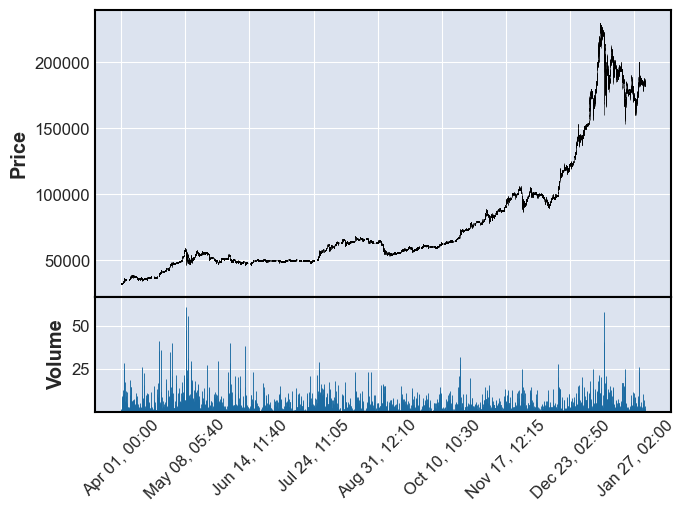

In [39]:

mpf.plot(df_open,type='candle',volume=True)

In [19]:
# https://github.com/wilsonfreitas/awesome-quant

In [20]:
# def momentum(serie_can_open,n):
#     final = serie_can_open.iloc[-1]
#     inicio = serie_can_open.iloc[-n]
#     mo = final- inicio
#     return mo

In [21]:
# momentum(df_open["Close"],10)

In [22]:
# def get_momentum_movel_lista(series_sc, n):
# #     series_sc = df_open["Close"]
# #     n=9
#     tamnho_lista = len(series_sc)
#     ls_saida = []
#     for i in range(tamnho_lista):
#         r_valido = (tamnho_lista - i - n) > 0
#         if r_valido:
#     #             print(r_valido)
#             next_lista = series_sc.iloc[:-i-1]
# #             print(i)
#             ls_saida.append(momentum(next_lista,n))

#     return pd.Series(ls_saida,name=f'mometum_{n}')

        
    
    

In [23]:
# series_sc.iloc[:-7983]

In [24]:
# df_open["momentum"] = get_momentum_movel_lista(df_open["Close"],10)

In [25]:
# df_open

In [26]:
# https://proeducacional.com/ead/curso-cga-modulo-i/capitulos/capitulo-4/aulas/medias-moveis-simples-e-exponencial-cruzamento-bandas-de-bollinger/
# def media_exponencia(serie_candle_open, n, alpha=1):
# #     alpha = 2/(n+1)
# #     alpha = 1
#     def cr_map(entrada):
#         x= float(entrada[0])
#         i= entrada[1]
#         const = (1- alpha)**i
#         saida= const* x
#         return saida
        
#     ult_n = serie_candle_open.iloc[-n:]
#     zip_dados = zip(ult_n, list(range(n)))
#     saida = pd.Series(list(map(cr_map, zip_dados)), name="Open").sum()
#     return saida
    
    
    
    

In [27]:
# media_exponencia(df_open["Close"], 10)

In [28]:
# s_entra = df_open["Close"]
# print(media_exponencia(s_entra.iloc[:-1], 10))
# print(media_exponencia(s_entra.iloc[:-2], 10))
# print(media_exponencia(s_entra.iloc[:-3], 10))
# print(media_exponencia(s_entra.iloc[:-4], 10))


In [29]:
# def macd(s_candle_op, periodo=9, n_inicial=12, n_final=26):
#     ls_saida = []
#     for i in range(periodo):
#         next_list = s_candle_op.iloc[:-i]
        
#         l_ema_inicial = media_exponencia(next_list, n_inicial)
#         l_ema_final = media_exponencia(next_list, n_final)
#         l_saida = l_ema_final - l_ema_inicial
        
#         ls_saida.append(l_saida)
    
#     saida_macd = media_exponencia(pd.Series(ls_saida), periodo)
#     return saida_macd



In [30]:
# macd(df_open["Close"])

In [31]:
# df_open["Close"].iloc[-1]

In [32]:
# periodo = 9
# i = 5
# df_open["Close"].iloc[-periodo-i:-i]

In [33]:
# series

In [34]:
# df['price'].resample('15Min')

In [35]:
# from finta import TA

In [36]:
# TA.SMA(df_open, 42)

In [37]:
# a = df["time_d"][0]

In [38]:
# print(a.timestamp())